In [96]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import affine_transform
import surfa as sf
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd 
import json
import os
from matplotlib.lines import Line2D
from scipy.stats import linregress

In [97]:
subjects = [
    "366_53yrOld_edited",
    "388_21yrOld_edited",
    "401_5yrOld_edited",
    "EA1046",
    "EA1048A",
    "EA1049A",
    "EA1050A",
    "EA1050B",
    "EA1051A",
    "EA1052A",
    "EA1055A",
    "EA1056A",
    "EA1057A",
    "EA1058A",
    "EA1062A",
    "EA1063A",
    "EA1064A",
    "EA1065A",
    "EA1069A",
    "EA1070A",
    "EA1072A",
    "EA1073A",
    "EA1073B",
    "EA1074A",
    "EA1076A",
    "EA1078B",
    "EA1079A",
    "MIMS_HC_036",
    "MIMS_HC_037",
    "MIMS_HC_038",
    "MIMS_HC_039",
    "MIMS_HC_040",
    "MIMS_HC_043",
    "MIMS_HC_045",
    "MIMS_HC_047",
    "MIMS_HC_049",
    "MIMS_HC_050",
    "MIMS_HC_051",
    "MIMS_HC_052",
    "MIMS_HC_053",
    "MIMS_HC_056",
    "MIMS_HC_057",
    "MIMS_HC_059",
    "MIMS_HC_060",
    "MIMS_HC_061",
    "MIMS_HC_062",
    "MIMS_HC_064",
    "MIMS_HC_065",
    "MIMS_HC_066",
    "EA1046",
    "EA1048A",
    "EA1049A",
    "EA1050A",
    "EA1050B",
    "EA1051A",
    "EA1052A",
    "EA1055A",
    "EA1056A",
    "EA1057A",
    "EA1058A",
    "EA1062A",
    "EA1063A",
    "EA1064A",
    "EA1065A",
    "EA1069A",
    "EA1070A",
    "EA1072A",
    "EA1073A",
    "EA1073B",
    "EA1074A",
    "EA1076A",
    "EA1078B",
    "EA1079A",
    "STE_001",
    "STE_002",
    "STE_003",
    "STE_004",
    "STE_005",
    "STE_006",
    "STE_007",
    "STE_008",
    "STE_009",
    "STE_010",
    "STE_011",
    "STE_016",
    "STE_017",
    "STE_018",
    "U01_D2002",
    "blast_c_269",
    "sllip_001",
    "sllip_002",
    "sllip_007",
    "sllip_008",
    "sllip_010",
    "sllip_013",
    "sllip_014",
    "sllip_026",
    "sllip_027",
    "sllip_029",
    "sllip_030"
]


In [104]:
data_list = []
for i, subj in enumerate(subjects):
    json_file = f"/Volumes/Teah2/Gyri_sulci/SG_Outputs/{subj}_gy-sulc_Output/FinalOutputs/averages.json"
    
    if os.path.exists(json_file):
        with open(json_file, "r") as f:
            data = json.load(f)

            data_list.append({
                    "Subject ID": data['subject id '],
                    "Age": data['Age'],
                    "Whole Brain Percent Difference": data['Whole Brain Percent Difference'],
                    "Inner Outer Cortex Percent Difference": data["Inner Outer Cortex Percent Difference"],
                    "Whole Brain Absolute Difference": data["Whole Brain Absolute Difference"],
                    "Whole Brain Gyri Sulci Ratio": data["Whole Brain Gyri Sulci Ratio"],
                    "Whole Brain Crown Fundus Percent Difference": data["Whole Brain Crown Fundus Percent Difference"],
                    "Whole Brain Crown Fundus Absolute Difference": data["Whole Brain Crown Fundus Absolute Difference"],
                    "Whole Brain Crown Fundus Ratio": data["Whole Brain Crown Fundus Ratio"],
                    "Whole Brain Sulci Stiffness": data["Whole Brain Sulci Stiffness"],
                    "Whole Brain Gyri Stiffness": data["Whole Brain Gyri Stiffness"],
                    "Gyral Crown Stiffness": data['Whole Brain Crown Stiffness'],
                    "Sulcal Fundus Stiffness": data['Whole Brain Fundus Stiffness']
                })

    else:
        print(f"{subj}: averages.json not found.")


MIMS_HC_039: averages.json not found.
MIMS_HC_040: averages.json not found.
MIMS_HC_043: averages.json not found.
MIMS_HC_052: averages.json not found.
MIMS_HC_053: averages.json not found.
MIMS_HC_059: averages.json not found.
MIMS_HC_060: averages.json not found.
MIMS_HC_062: averages.json not found.
MIMS_HC_065: averages.json not found.
MIMS_HC_066: averages.json not found.
sllip_010: averages.json not found.


In [105]:
data

{'subject id ': 'sllip_030',
 'Age': 6,
 'Whole Brain Gyri Stiffness': 3181.164874892611,
 'Whole Brain Sulci Stiffness': 3282.9999352445275,
 'Whole Brain Percent Difference': 3.150756929718694,
 'Whole Brain Absolute Difference': 101.83506035191658,
 'Whole Brain Gyri Sulci Ratio': 0.9689810958390008,
 'LeftCaudal Middle Frontal - Gyri Stiffness': 2781.4101262604663,
 'Left Caudal Middle Frontal - Sulci Stiffness': 2917.5143630701423,
 'Left Caudal Middle Frontal - Gyri Sulci Percent Difference': 4.776488513384836,
 'Left Caudal Middle Frontal - Gyri Sulci Absolute Difference': 136.10423680967597,
 'Left Caudal Middle Frontal - Gyri Sulci Ratio': 0.9533492487535,
 'LeftPrecentral - Gyri Stiffness': 2862.3591377404173,
 'Left Precentral - Sulci Stiffness': 3036.7352644521025,
 'Left Precentral - Gyri Sulci Percent Difference': 5.911962576726173,
 'Left Precentral - Gyri Sulci Absolute Difference': 174.37612671168517,
 'Left Precentral - Gyri Sulci Ratio': 0.942577764761741,
 'LeftRost

In [106]:
df = pd.DataFrame(data_list)
print(df)

            Subject ID  Age  Whole Brain Percent Difference  \
0   366_53yrOld_edited   53                       21.899099   
1   388_21yrOld_edited   21                        5.634463   
2    401_5yrOld_edited    5                        3.048582   
3               EA1046   13                        8.275571   
4              EA1048A   12                        4.762395   
..                 ...  ...                             ...   
84           sllip_014    5                        8.048594   
85           sllip_026    6                        2.476426   
86           sllip_027    6                        4.230879   
87           sllip_029    5                        5.435159   
88           sllip_030    6                        3.150757   

    Inner Outer Cortex Percent Difference  Whole Brain Absolute Difference  \
0                                6.640318                       518.881470   
1                                2.360332                       138.504655   
2        

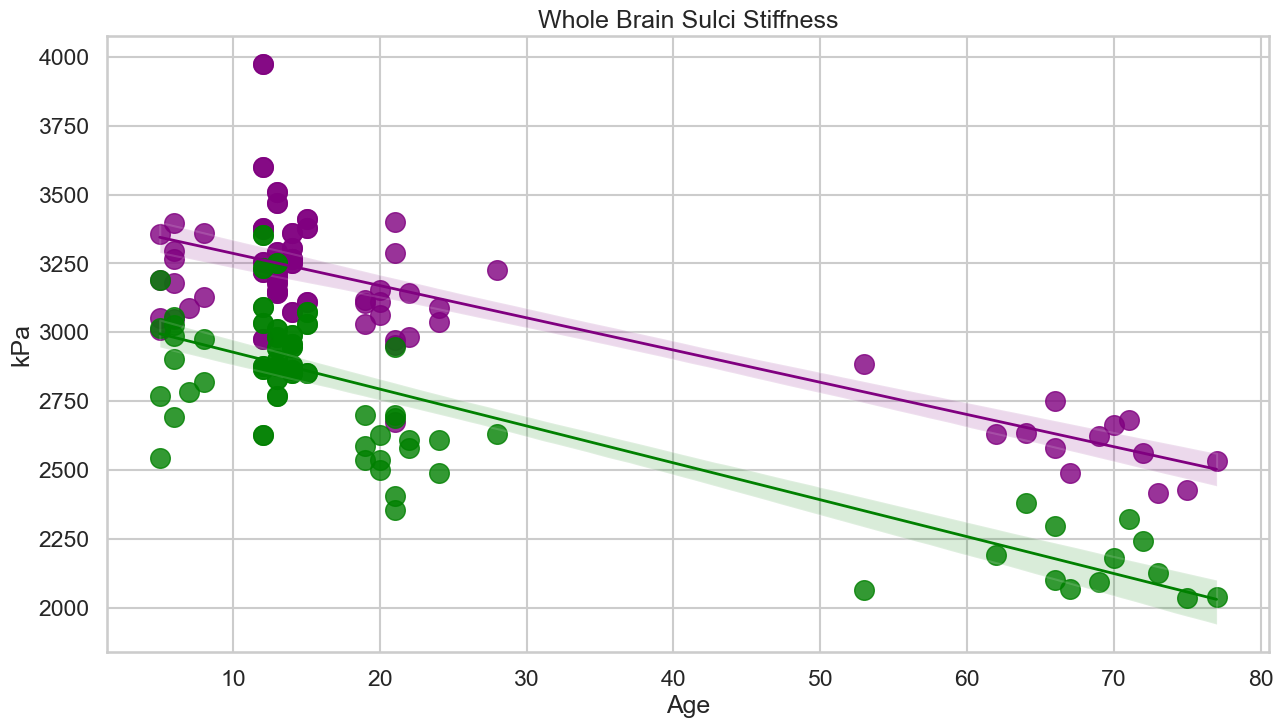

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')
sns.regplot(x='Age', y='Sulcal Fundus Stiffness', data=df, 
            scatter_kws={'s': 200, 'marker': 'o','color':'purple'}, 
            line_kws={'color': 'purple', 'linewidth': 2})

sns.regplot(x='Age', y='Gyral Crown Stiffness', data=df, 
            scatter_kws={'s': 200, 'marker': 'o','color':'green'}, 
            line_kws={'color': 'green', 'linewidth': 2})

#sns.scatterplot(x='Age', y='Whole Brain Percent Difference', data=df, marker='o',  s=200)
#sns.scatterplot(x=[5, 21, 53],y=[3.60, 6.70, 20.36], marker='D',  s=200, label='Orignal Data')
plt.title('Whole Brain Sulci Stiffness')

plt.xlabel('Age')
plt.ylabel('kPa')
#plt.ylim(0, 50) 
#plt.savefig('whole_brain_ages.jpg', dpi=300)
plt.show()

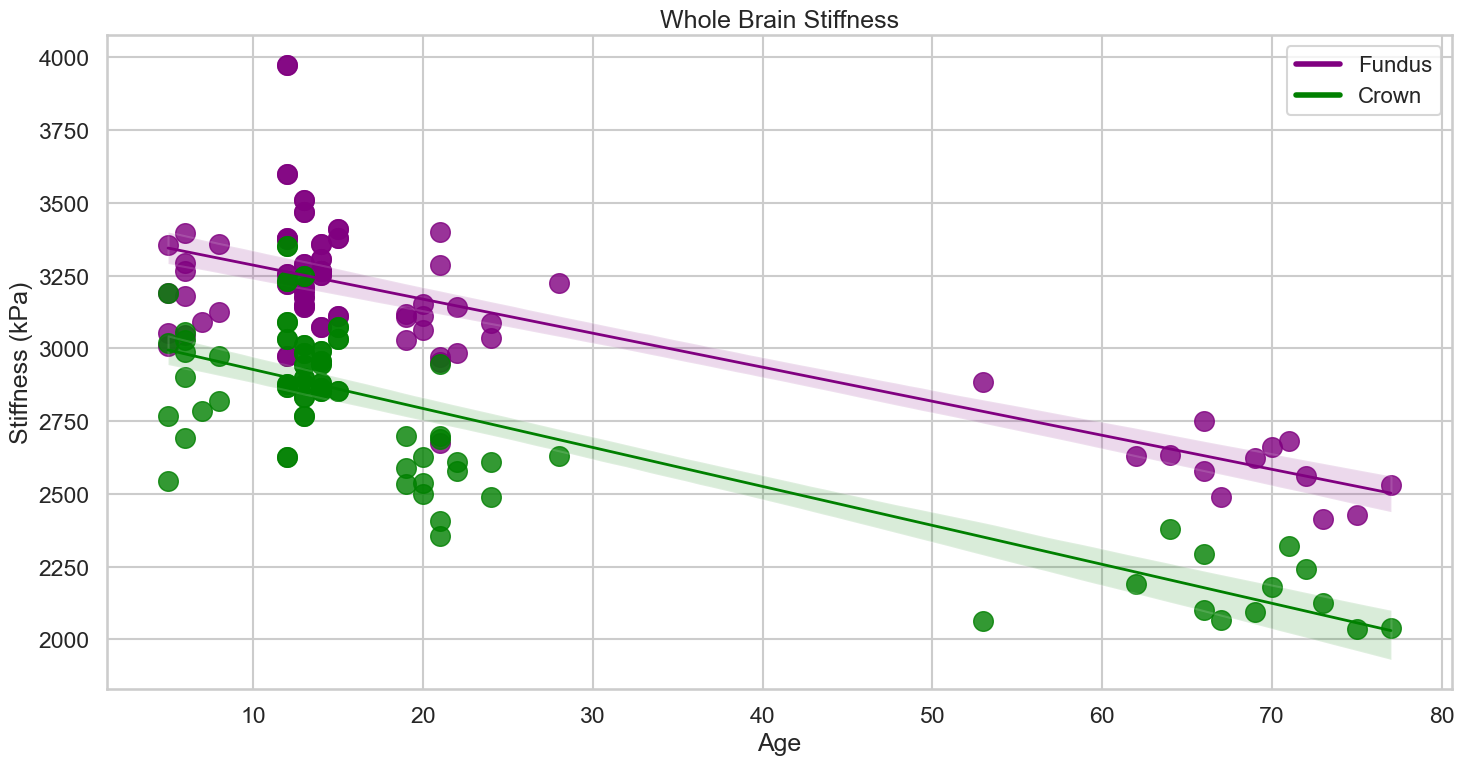

In [101]:

plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')
"""
sns.regplot(x='Age', y='Whole Brain Sulci Stiffness', data=df, 
            scatter_kws={'s': 200, 'marker': 'o','color':'purple'}, 
            line_kws={'color': 'purple', 'linewidth': 2})

sns.regplot(x='Age', y='Whole Brain Gyri Stiffness', data=df, 
            scatter_kws={'s': 200, 'marker': 'o','color':'green'}, 
            line_kws={'color': 'green', 'linewidth': 2})
"""
sns.regplot(x='Age', y='Sulcal Fundus Stiffness', data=df, 
            scatter_kws={'s': 200, 'marker': 'o','color':'purple'}, 
            line_kws={'color': 'purple', 'linewidth': 2})

sns.regplot(x='Age', y='Gyral Crown Stiffness', data=df, 
            scatter_kws={'s': 200, 'marker': 'o','color':'green'}, 
            line_kws={'color': 'green', 'linewidth': 2})
plt.legend(labels=['Sulci', 'Gyri','Fundus','Crown'], fontsize=16)
#sns.scatterplot(x='Age', y='Whole Brain Percent Difference', data=df, marker='o',  s=200)
#sns.scatterplot(x=[5, 21, 53],y=[3.60, 6.70, 20.36], marker='D',  s=200, label='Orignal Data')

legend_elements = [
    #Line2D([0], [0], color='purple', lw=4, label='Sulci'),
    #Line2D([0], [0], color='green', lw=4, label='Gyri'),
    Line2D([0], [0], color='purple', lw=4, label='Fundus'),
    Line2D([0], [0], color='green', lw=4, label='Crown'),
]

plt.legend(handles=legend_elements, fontsize=16)

plt.title('Whole Brain Stiffness')
plt.xlabel('Age')
plt.ylabel('Stiffness (kPa)')
plt.tight_layout()
plt.show()

In [102]:
df_gyri = df[['Age', 'Gyral Crown Stiffness']].dropna()
df_sulci = df[['Age', 'Sulcal Fundus Stiffness']].dropna()

# Gyri regression
slope_gyri, intercept_gyri, r_value_gyri, p_value_gyri, std_err_gyri = linregress(
    df_gyri['Age'], df_gyri['Gyral Crown Stiffness'])

# Sulci regression
slope_sulci, intercept_sulci, r_value_sulci, p_value_sulci, std_err_sulci = linregress(
    df_sulci['Age'], df_sulci['Sulcal Fundus Stiffness'])

# Print results
print(f"Gyri: y = {slope_gyri:.4f}x + {intercept_gyri:.4f}  (R² = {r_value_gyri**2:.4f})")
print(f"Sulci: y = {slope_sulci:.4f}x + {intercept_sulci:.4f}  (R² = {r_value_sulci**2:.4f})")


Gyri: y = -13.3950x + 3061.4692  (R² = 0.6823)
Sulci: y = -11.6996x + 3403.2942  (R² = 0.6147)


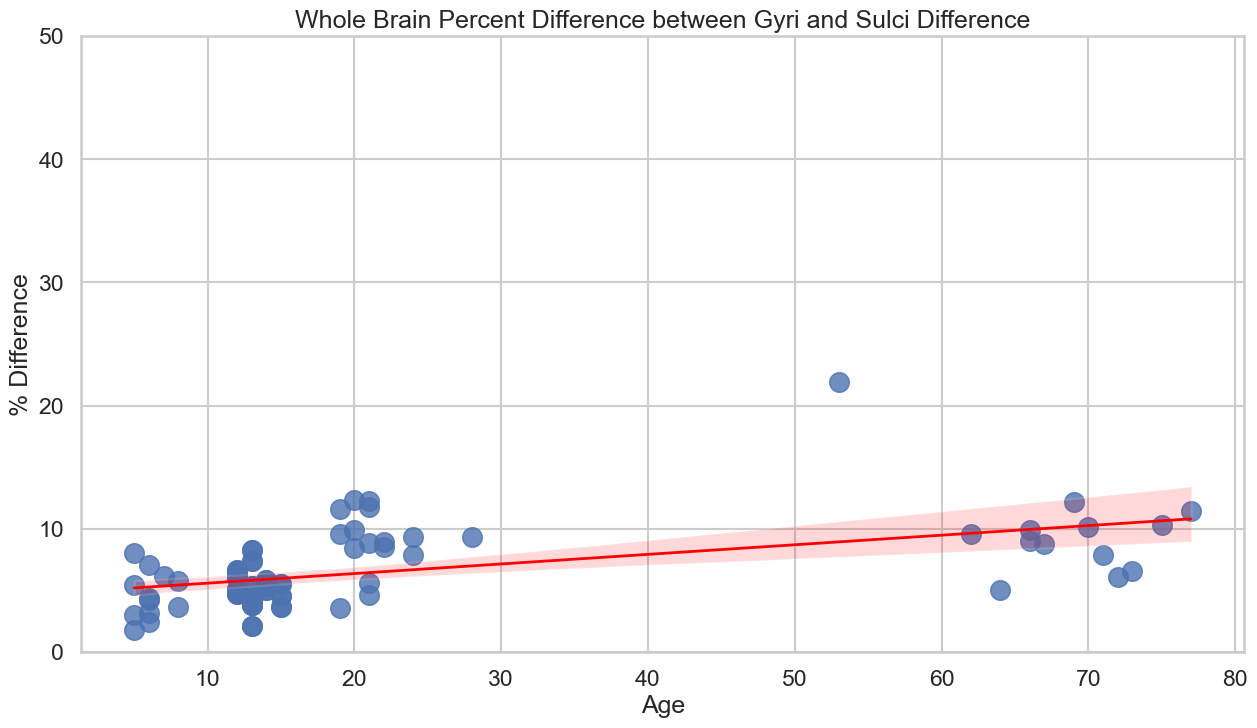

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')
sns.regplot(x='Age', y='Whole Brain Percent Difference', data=df, 
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
#sns.scatterplot(x='Age', y='Whole Brain Percent Difference', data=df, marker='o',  s=200)
#sns.scatterplot(x=[5, 21, 53],y=[3.60, 6.70, 20.36], marker='D',  s=200, label='Orignal Data')
plt.title('Whole Brain Percent Difference between Gyri and Sulci Difference')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim(0, 50) 
plt.savefig('whole_brain_ages.jpg', dpi=300)
plt.show()

In [110]:
df_whole_perc = df[['Age', 'Whole Brain Percent Difference']].dropna()

slope_perc, intercept_perc, r_value_perc, p_value_perc, std_err_perc = linregress(
    df_whole_perc['Age'], df_whole_perc['Whole Brain Percent Difference'])
# Print results
print(f"y = {slope_perc:.4f}x + {intercept_perc:.4f}  (R² = {r_value_perc**2:.4f})")


y = 0.0779x + 4.8164  (R² = 0.2691)


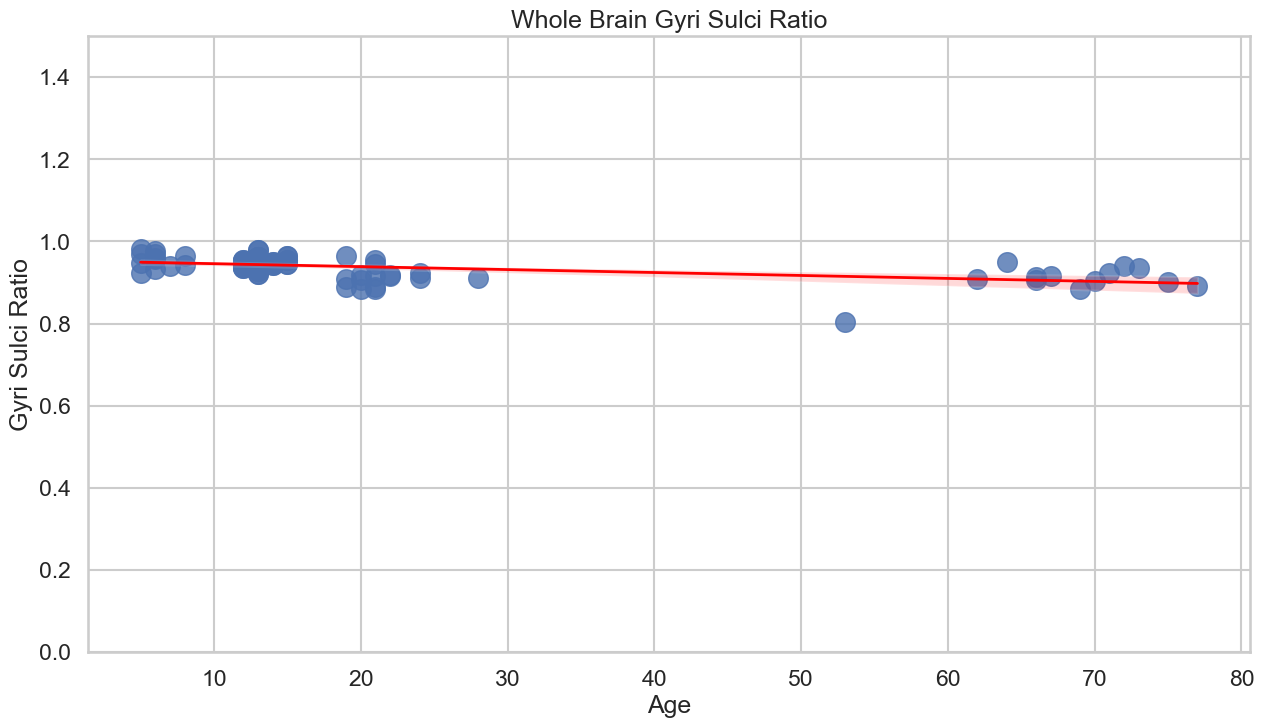

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')
sns.regplot(x='Age', y='Whole Brain Gyri Sulci Ratio', data=df, 
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})

#sns.scatterplot(x=[5, 21, 53],y=[3.60, 6.70, 20.36], marker='D',  s=200, label='Orignal Data')
plt.title('Whole Brain Gyri Sulci Ratio')

plt.xlabel('Age')
plt.ylabel('Gyri Sulci Ratio')
plt.ylim([0,1.5])
plt.savefig('whole_brain_ages.jpg', dpi=300)
plt.show()

In [112]:
df_whole_ratio = df[['Age', 'Whole Brain Gyri Sulci Ratio']].dropna()

slope_perc, intercept_perc, r_value_perc, p_value_perc, std_err_perc = linregress(
    df_whole_ratio['Age'], df_whole_ratio['Whole Brain Gyri Sulci Ratio'])
# Print results
print(f"y = {slope_perc:.4f}x + {intercept_perc:.4f}  (R² = {r_value_perc**2:.4f})")


y = -0.0007x + 0.9530  (R² = 0.2727)


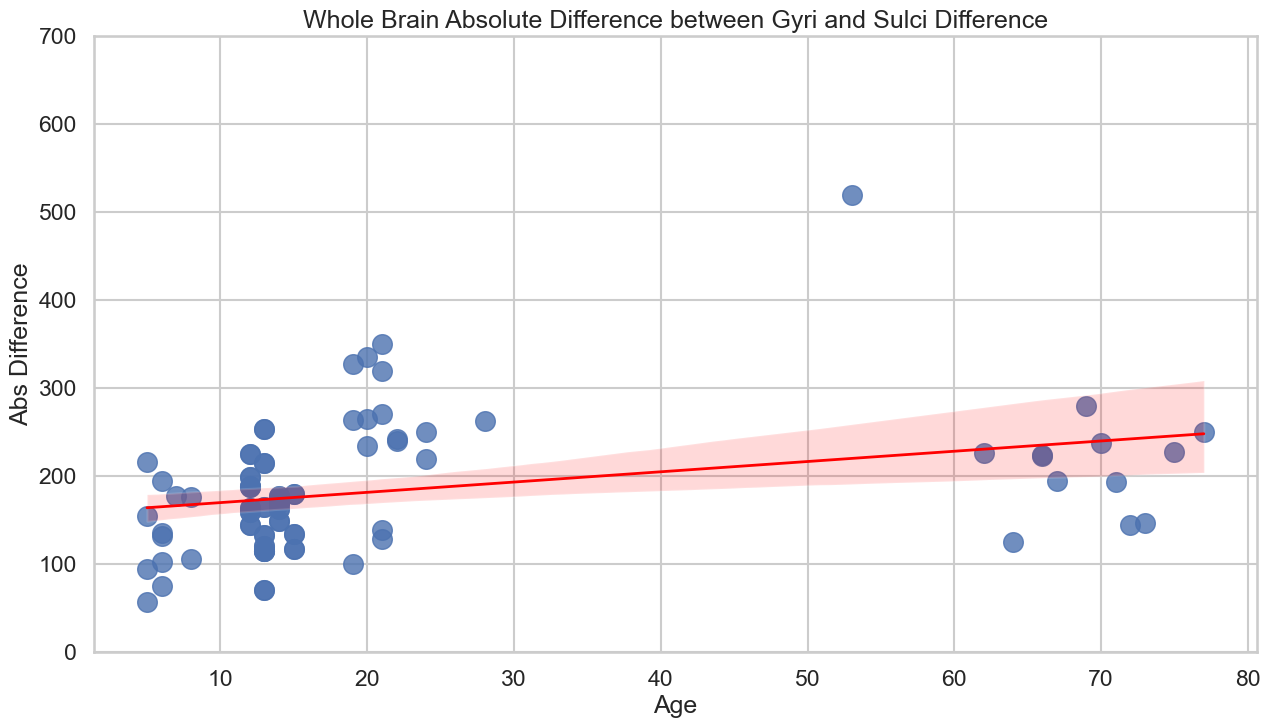

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')
#sns.scatterplot(x='Age', y='Whole Brain Absolute Difference', data=df, marker='o',  s=200, label='Older Adults')
sns.regplot(x='Age', y='Whole Brain Absolute Difference', data=df, 
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
#sns.scatterplot(x=[5, 21, 53],y=[3.60, 6.70, 20.36], marker='D',  s=200, label='Orignal Data')
plt.title('Whole Brain Absolute Difference between Gyri and Sulci Difference')

plt.xlabel('Age')
plt.ylabel('Abs Difference')
plt.ylim([0,700])
plt.savefig('whole_brain_ages.jpg', dpi=300)
plt.show()

In [118]:
df_whole_abs = df[['Age', 'Whole Brain Absolute Difference']].dropna()

slope_abs, intercept_abs, r_value_abs, p_value_abs, std_err_abs = linregress(
    df_whole_abs['Age'], df_whole_abs['Whole Brain Absolute Difference'])
# Print results
print(f"y = {slope_abs:.4f}x + {intercept_abs:.4f}  (R² = {r_value_abs**2:.4f})")

y = 1.1674x + 158.1872  (R² = 0.1088)


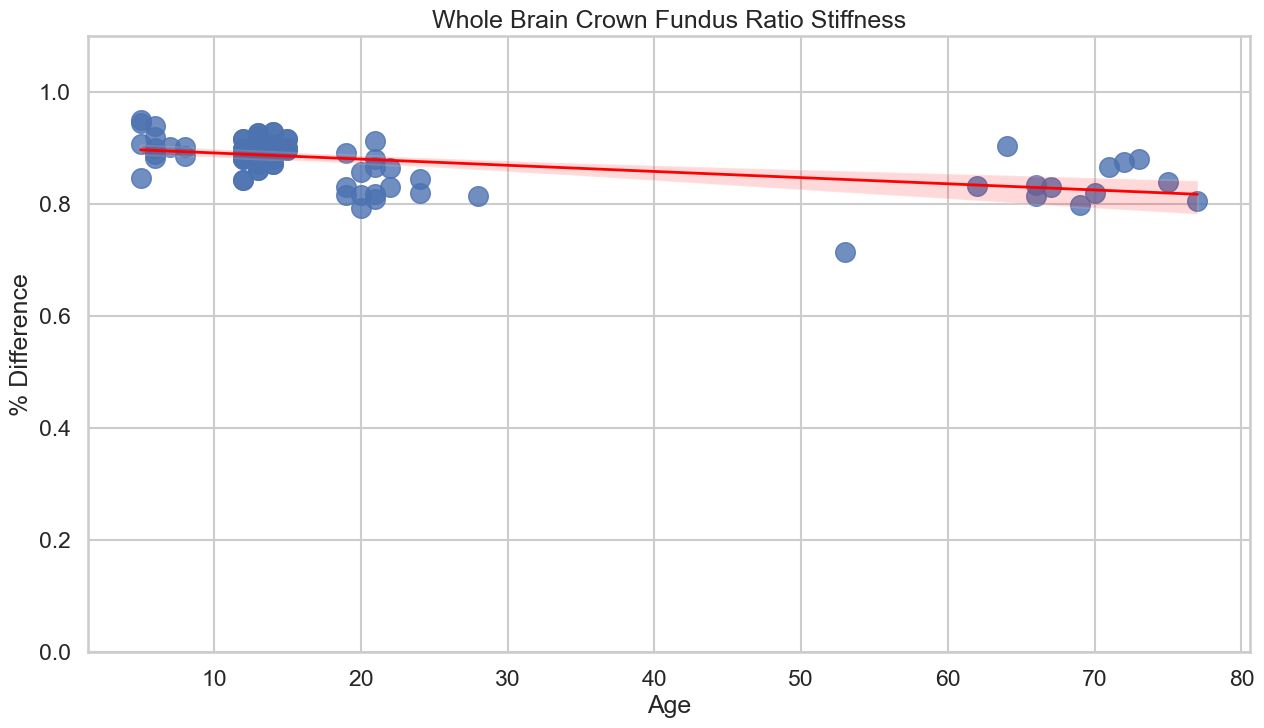

In [119]:
#Whole Brain Crown Fundus Percent Difference


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Whole Brain Crown Fundus Ratio', data=df,
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Crown Fundus Ratio Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim([0, 1.1])
plt.show()

In [122]:
df_cf_ratio = df[['Age', 'Whole Brain Crown Fundus Ratio']].dropna()

slope_cf_ratio, intercept_cf_ratio, r_value_cf_ratio, p_value_cf_ratio, std_err_cf_ratio = linregress(
    df_cf_ratio['Age'], df_cf_ratio['Whole Brain Crown Fundus Ratio'])
# Print results
print(f"y = {slope_cf_ratio:.4f}x + {intercept_cf_ratio:.4f}  (R² = {r_value_cf_ratio**2:.4f})")

y = -0.0011x + 0.9023  (R² = 0.2861)


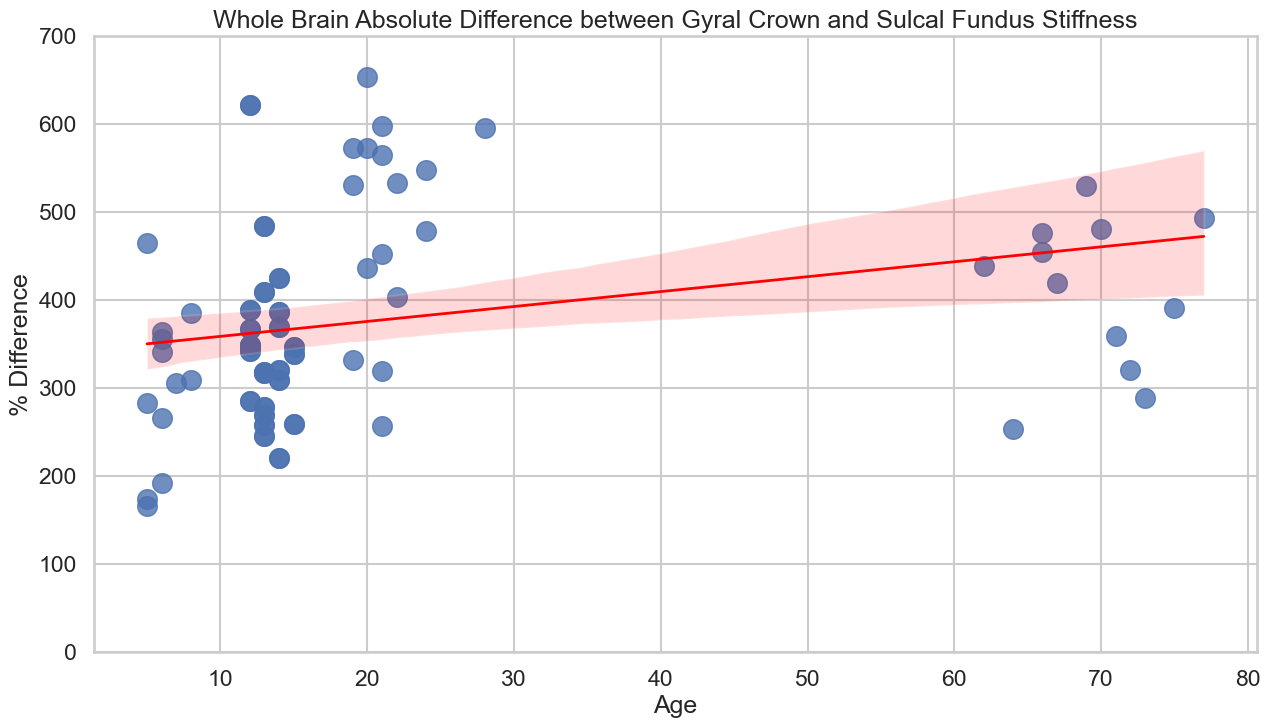

In [67]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Whole Brain Crown Fundus Absolute Difference', data=df,
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Absolute Difference between Gyral Crown and Sulcal Fundus Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim([0,700])
plt.show()

In [121]:
df_cf_abs = df[['Age', 'Whole Brain Crown Fundus Absolute Difference']].dropna()

slope__cf_abs, intercept_cf_abs, r_value_cf_cf_abs, p_value_cf_abs, std_err_cf_abs = linregress(
    df_cf_abs['Age'], df_cf_abs['Whole Brain Crown Fundus Absolute Difference'])
# Print results
print(f"y = {slope_cf_ratio:.4f}x + {intercept_cf_ratio:.4f}  (R² = {r_value_cf_ratio**2:.4f})")

y = -0.0011x + 0.9023  (R² = 0.2861)


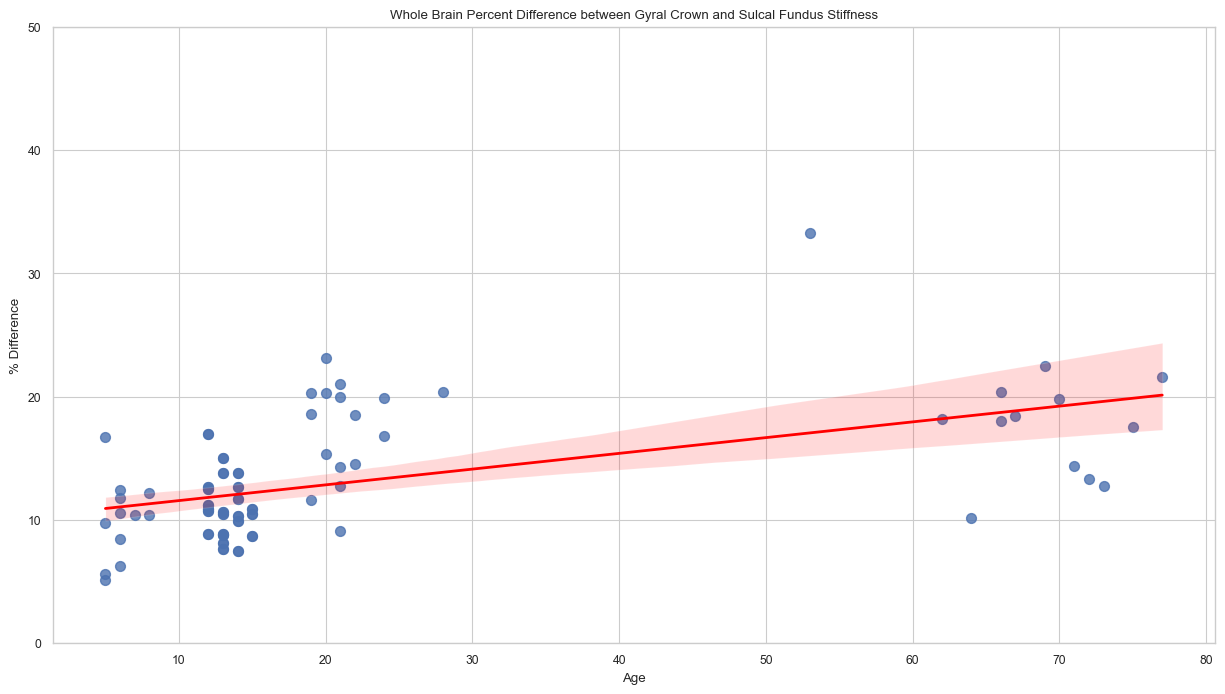

In [125]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='paper')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Whole Brain Crown Fundus Percent Difference', data=df,
            scatter_kws={'s': 50, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Percent Difference between Gyral Crown and Sulcal Fundus Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim([0, 50])
plt.show()

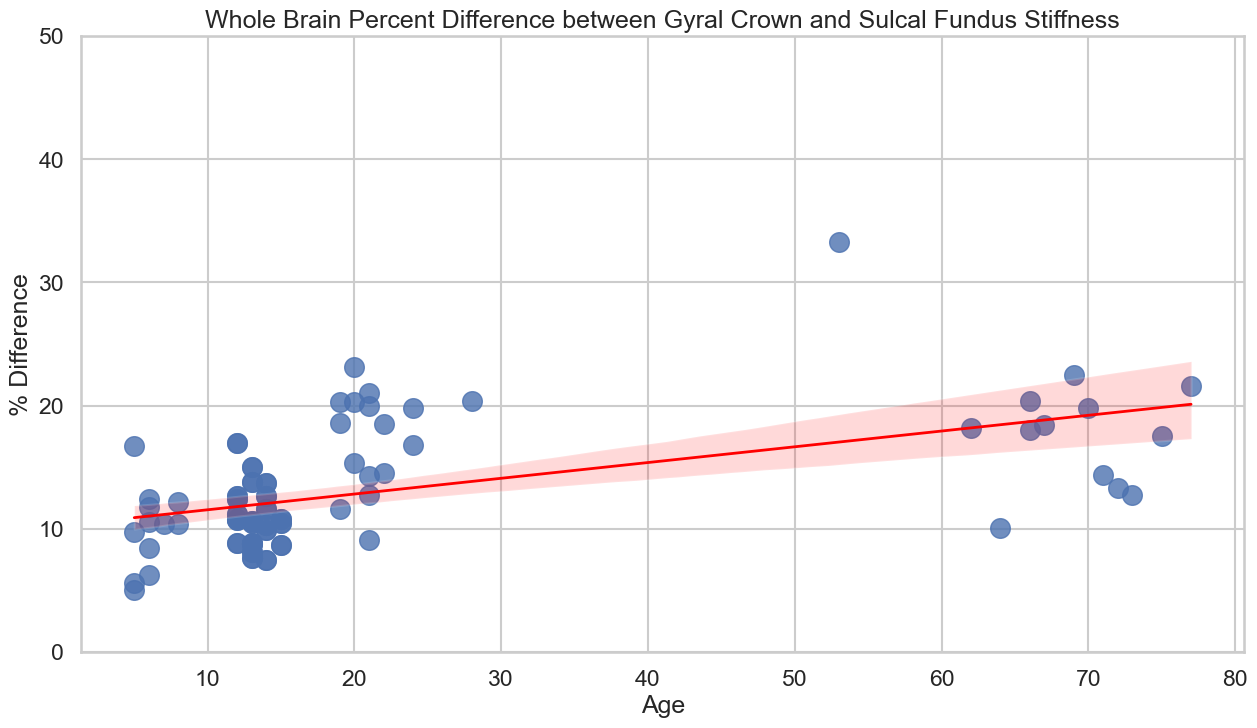

In [68]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Whole Brain Crown Fundus Percent Difference', data=df,
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Percent Difference between Gyral Crown and Sulcal Fundus Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim([0, 50])
plt.show()

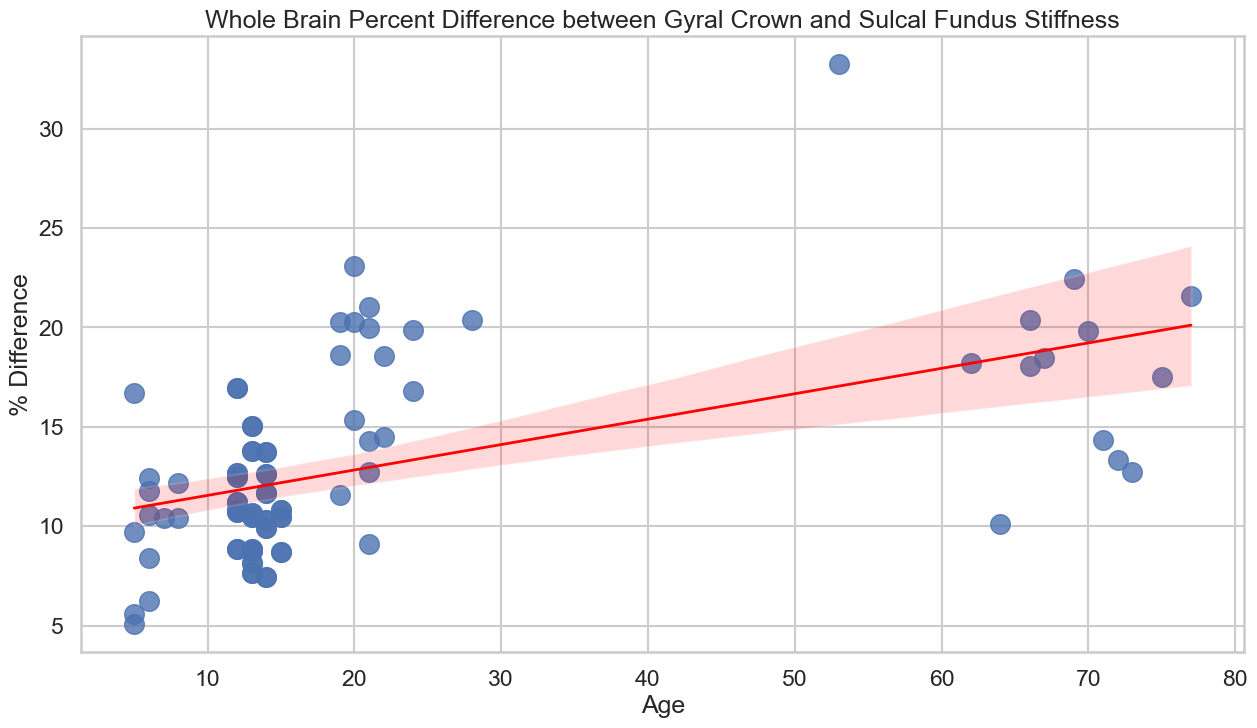

In [69]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Whole Brain Crown Fundus Ratio Percent Difference', data=df,
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Percent Difference between Gyral Crown and Sulcal Fundus Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.show()

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Cortex Percent Difference', data=df, color='green', 
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Percent Difference between Inner and Outer Cortex Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim(0, 13) 
plt.savefig('in_out_cortex_ages.jpg', dpi=300)
plt.show()

KeyError: 'Cortex Percent Difference'

<Figure size 1500x800 with 0 Axes>

In [ ]:
Whole Brain Crown Fundus Percent Difference

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.set(style='whitegrid',
        context='talk')

#sns.scatterplot(x='Age', y='Cortex Percent Difference', data=df, color='green', marker='X', s=200 )
sns.regplot(x='Age', y='Whole Brain Crown Fundus Percent Difference', data=df, color='green', 
            scatter_kws={'s': 200, 'marker': 'o'}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Whole Brain Percent Difference between Inner and Outer Cortex Stiffness')

plt.xlabel('Age')
plt.ylabel('% Difference')
plt.ylim(0, 13) 
plt.savefig('in_out_cortex_ages.jpg', dpi=300)
plt.show()